In [8]:
import pandas as pd

In [10]:
# Fix the file that Emily sent me
"""
df = pd.read_csv('data/CIDS_dragon.txt', delimiter='\t')
df['CID'] = df['NAME'].apply(lambda x:x.split(': ')[0])
df['SMILES'] = df['NAME'].apply(lambda x:x.split(': ')[1])
df = df.set_index('CID')
df = df[['SMILES'] + list(df)[2:-1]] # Move SMILES to front and drop NAME and No.
df.index = df.index.astype(int)
df = df.sort_index()
df.head()
df.to_csv('data/cids-smiles-dragon.txt')
""";

In [60]:
dfs = {}
dfs['dragon'] = pd.read_csv('data/cids-smiles-dragon.txt').set_index('CID')
dfs['mordred'] = pd.read_csv('data/mordred-features.csv').set_index('CID')

In [61]:
dfs['dragon'].head()

,SMILES,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,...,Psychotic-80,Psychotic-50,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
CID,,,,,,,,,,,,,,,,,,,,,
4,CC(CN)O,75.13,5.366,6.843,13.964,7.506,16.369,0.489,0.997,0.536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,C(CC(=O)O)CN,103.14,6.446,8.558,16.291,8.960,18.578,0.535,1.018,0.560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,C1=CC(=CC=C1CO)O,124.15,7.303,10.537,17.189,10.955,19.080,0.620,1.011,0.644,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,C1=CC(=CC=C1C=O)O,122.13,8.142,10.010,15.305,10.193,16.664,0.667,1.020,0.680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,C1=CC(=CC=C1CC(=O)O)O,152.16,8.008,12.252,19.516,12.409,21.289,0.645,1.027,0.653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
dfs['mordred'].head()

,name,IUPACName,SMILES,MolecularWeight,HeavyCount,ABC,ABCGG,nAcid,nBase,SpAbs_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
CID,,,,,,,,,,,,,,,,,,,,,
4,1-aminopropan-2-ol,1-aminopropan-2-ol,CC(CN)O,75.111,5,3.047207,3.305183,0.0,1.0,5.226252,...,6.834109,27.254130,75.068414,5.362030,18.0,2.0,16.0,14.0,3.361111,1.333333
119,4-aminobutyric acid,4-aminobutanoic acid,C(CC(=O)O)CN,103.121,7,4.461420,4.736714,1.0,1.0,7.727407,...,7.321850,31.336140,103.063329,6.441458,52.0,4.0,24.0,22.0,3.861111,1.833333
125,4-hydroxybenzyl alcohol,4-(hydroxymethyl)phenol,C1=CC(=CC=C1CO)O,124.139,9,6.473351,6.127583,0.0,0.0,11.189957,...,8.590258,37.289972,124.052429,7.297202,90.0,9.0,40.0,43.0,3.472222,2.166667
126,4-hydroxybenzaldehyde,4-hydroxybenzaldehyde,C1=CC(=CC=C1C=O)O,122.123,9,6.473351,6.127583,0.0,0.0,11.189957,...,8.590258,37.289972,122.036779,8.135785,90.0,9.0,40.0,43.0,3.472222,2.166667
127,4-hydroxyphenylacetic acid,2-(4-hydroxyphenyl)acetic acid,C1=CC(=CC=C1CC(=O)O)O,152.149,11,8.106344,7.427049,1.0,0.0,13.221782,...,8.795279,40.344003,152.047344,8.002492,166.0,11.0,50.0,53.0,4.583333,2.500000


In [63]:
# Only one molecule has mordred features but no dragon features
dfs['mordred'].index.difference(dfs['dragon'].index)

Int64Index([17967112], dtype='int64', name='CID')

In [64]:
dfs['mordred'] = dfs['mordred'].loc[dfs['dragon'].index].iloc[:, 3:]
dfs['mordred'].head()

,MolecularWeight,HeavyCount,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
CID,,,,,,,,,,,,,,,,,,,,,
4,75.111,5,3.047207,3.305183,0.0,1.0,5.226252,1.847759,3.695518,5.226252,...,6.834109,27.254130,75.068414,5.362030,18.0,2.0,16.0,14.0,3.361111,1.333333
119,103.121,7,4.461420,4.736714,1.0,1.0,7.727407,1.931852,3.863703,7.727407,...,7.321850,31.336140,103.063329,6.441458,52.0,4.0,24.0,22.0,3.861111,1.833333
125,124.139,9,6.473351,6.127583,0.0,0.0,11.189957,2.193993,4.387987,11.189957,...,8.590258,37.289972,124.052429,7.297202,90.0,9.0,40.0,43.0,3.472222,2.166667
126,122.123,9,6.473351,6.127583,0.0,0.0,11.189957,2.193993,4.387987,11.189957,...,8.590258,37.289972,122.036779,8.135785,90.0,9.0,40.0,43.0,3.472222,2.166667
127,152.149,11,8.106344,7.427049,1.0,0.0,13.221782,2.219936,4.439872,13.221782,...,8.795279,40.344003,152.047344,8.002492,166.0,11.0,50.0,53.0,4.583333,2.500000


In [65]:
dfs['dragon'] = dfs['dragon'].iloc[:, 1:]
dfs['dragon'].head()

,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,Psychotic-80,Psychotic-50,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
CID,,,,,,,,,,,,,,,,,,,,,
4,75.13,5.366,6.843,13.964,7.506,16.369,0.489,0.997,0.536,1.169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,103.14,6.446,8.558,16.291,8.960,18.578,0.535,1.018,0.560,1.161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,124.15,7.303,10.537,17.189,10.955,19.080,0.620,1.011,0.644,1.122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,122.13,8.142,10.010,15.305,10.193,16.664,0.667,1.020,0.680,1.111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,152.16,8.008,12.252,19.516,12.409,21.289,0.645,1.027,0.653,1.120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
from sklearn.preprocessing import StandardScaler
ss = {}
for kind in ['dragon', 'mordred']:
    ss[kind] = StandardScaler() 
    good = dfs[kind].columns[dfs[kind].isnull().sum()<500]
    df = dfs[kind][good]
    scaled = ss[kind].fit_transform(df.astype('float'))
    dfs[kind+'_good'] = pd.DataFrame(scaled, index=df.index, columns=df.columns)

In [78]:
from fancyimpute import KNN
knns = {}
for kind in ['dragon', 'mordred']:
    knns[kind] = KNN(k=5)
    df = dfs[kind+'_good']
    imputed = knns[kind].fit_transform(df.values)
    dfs[kind+'_imputed'] = pd.DataFrame(imputed, index=df.index, columns=df.columns)

Imputing row 1/2195 with 0 missing, elapsed time: 88.867
Imputing row 101/2195 with 0 missing, elapsed time: 88.916
Imputing row 201/2195 with 0 missing, elapsed time: 88.921
Imputing row 301/2195 with 0 missing, elapsed time: 88.928
Imputing row 401/2195 with 0 missing, elapsed time: 88.932
Imputing row 501/2195 with 0 missing, elapsed time: 88.938
Imputing row 601/2195 with 0 missing, elapsed time: 88.941
Imputing row 701/2195 with 0 missing, elapsed time: 88.947
Imputing row 801/2195 with 0 missing, elapsed time: 88.950
Imputing row 901/2195 with 0 missing, elapsed time: 88.967
Imputing row 1001/2195 with 0 missing, elapsed time: 88.971
Imputing row 1101/2195 with 0 missing, elapsed time: 88.974
Imputing row 1201/2195 with 0 missing, elapsed time: 88.978
Imputing row 1301/2195 with 0 missing, elapsed time: 88.981
Imputing row 1401/2195 with 0 missing, elapsed time: 88.986
Imputing row 1501/2195 with 0 missing, elapsed time: 88.991
Imputing row 1601/2195 with 0 missing, elapsed time:

In [149]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(dfs['dragon_imputed'].values, dfs['mordred_imputed'].values[:,:])

/home/rgerkin/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [152]:
predicted = lasso.predict(dfs['dragon_imputed'])
observed = dfs['mordred_imputed']
rs = np.zeros(observed.shape[1])
for i, col in enumerate(observed):
    rs[i] = np.corrcoef(observed[col], predicted[:, i])[0,1]

/home/rgerkin/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


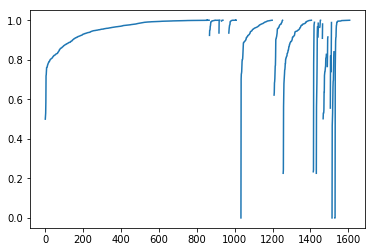

In [158]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(sorted(sorted(rs)))

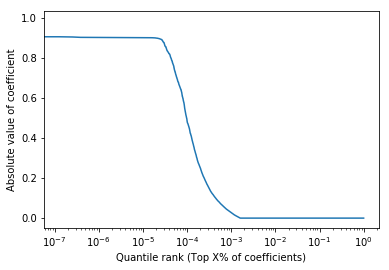

In [159]:
plt.plot(np.linspace(0,1,len(lasso.coef_.ravel())),sorted(np.abs(lasso.coef_.ravel()))[::-1])
plt.xscale('log')
plt.xlabel('Quantile rank (Top X% of coefficients)')
plt.ylabel('Absolute value of coefficient');